In [1]:
import pandas as pd
import numpy as np
import joblib

# 데스크탑
df = pd.read_csv("C:\\Users\\Hong_PC\\Desktop\\기상청 날씨 빅데이터 공모전\\과제2\\fog_train.csv", index_col=0)

# 노트북
# df = pd.read_csv("C:\\Users\\User\\Desktop\\기상청 날씨 빅데이터 공모전\\과제2\\fog_train.csv", index_col=0)

In [2]:
# 열 이름의 . 앞에 단어 제거
df.columns = [col.split('.')[-1] if '.' in col else col for col in df.columns]

In [3]:
df.columns

Index(['year', 'month', 'day', 'time', 'minute', 'stn_id', 'ws10_deg',
       'ws10_ms', 'ta', 're', 'hm', 'sun10', 'ts', 'vis1', 'class'],
      dtype='object')

In [4]:
# year열 I,J,K 순으로 0,1,2로 맵핑
df['year'].value_counts()
df['year'] = df['year'].map({'I': 0, 'J': 1, 'K': 2})

In [5]:
# 첫 글자를 추출하여 새로운 열 생성
df['first_letter'] = df['stn_id'].str[0]

# 알파벳 순서에 따라 번호를 부여
alphabet_order = {char: idx for idx, char in enumerate(sorted(df['first_letter'].unique()))}
df['stn_id'] = df['first_letter'].map(alphabet_order)
df.drop(columns=['first_letter'], inplace=True)

df['stn_id'].value_counts()

0    1262584
1     631292
3     473469
4     473468
2     315646
Name: stn_id, dtype: int64

In [6]:
numeric_cols = ['stn_id', 'ws10_deg', 'ws10_ms', 'ta', 'hm', 'sun10', 'ts']

# -99.9 값을 NaN으로 변환
df[numeric_cols] = df[numeric_cols].replace(-99.9, np.nan)

# 선형보간법을 이용하여 NA값 처리
df[numeric_cols] = df[numeric_cols].interpolate(method='linear')
# 강수 유무에 대해선 전의 값으로 채움
df['re'] = df['re'].interpolate(method='linear') # ffill

print(df.isnull().sum())

year        0
month       0
day         0
time        0
minute      0
stn_id      0
ws10_deg    0
ws10_ms     0
ta          0
re          0
hm          0
sun10       0
ts          0
vis1        0
class       0
dtype: int64


## CUSUM (Cumulative Sum Control Chart)의 개념

CUSUM (Cumulative Sum Control Chart)은 통계적 공정 관리에서 공정의 변화, 특히 작은 변화나 점진적인 변화를 감지하는 데 유용한 도구입니다. 이는 개별 데이터 포인트의 차이와 평균의 누적합을 이용하여 공정이 변하는 시점을 감지합니다.

## CUSUM의 작동 원리

CUSUM은 관측값이 공정의 평균에서 얼마나 벗어났는지를 누적하여 변화를 감지합니다. 이를 통해 시간 경과에 따른 누적된 차이를 추적할 수 있습니다.

### 누적합 계산

CUSUM 차트는 데이터 포인트 \( x_t \)와 공정의 목표 평균 \( \mu \)의 차이를 누적합으로 계산합니다.
\( C_t \)는 누적합으로 다음과 같이 정의됩니다:
\[ 
C_t = \max(0, C_{t-1} + (x_t - \mu - k))
\]
여기서 \( k \)는 제어 한계 계수입니다. 이는 작은 변화의 감지를 강화합니다.

### 상한선 (UCL)

CUSUM은 누적합이 상한선 (UCL: Upper Control Limit)을 초과할 때 공정이 통제 불능 상태로 간주합니다.
일반적으로 UCL은 표준편차 \( \sigma \)를 이용해 계산되며, 다음과 같이 정의됩니다:
\[ 
UCL = \text{ucl\_factor} \times \sigma
\]

## 제어 한계 계수 \( k \)와 UCL 계수 \( ucl\_factor \) 설정

### 제어 한계 계수 (\( k \)) 설정

- \( k \)는 "감도"를 조절하는 역할을 합니다.
- \( k \)는 일반적으로 공정의 표준편차 \( \sigma \)의 절반 정도로 설정됩니다. 즉, \( k = 0.5 \times \sigma \).
- \( k \)가 작을수록 작은 변화에도 민감하게 반응하지만, 너무 작으면 공정의 자연스러운 변동까지 이상으로 간주할 수 있습니다.

### UCL 계수 (\( ucl\_factor \)) 설정

- UCL은 공정이 통제 상태에 있는지를 판단하는 상한선입니다.
- UCL 계수는 공정의 표준편차 \( \sigma \)와 곱해져서 상한선을 설정합니다. 일반적으로 \( ucl\_factor \)는 5로 설정됩니다.
- \( ucl\_factor \)가 클수록 더 많은 이상치를 허용하게 되며, 작을수록 더 엄격한 기준을 적용하게 됩니다.

## 이론적 배경

- **감도 조정**: \( k \) 값은 공정의 평균에서 벗어난 작은 변화를 감지하는 데 사용됩니다. 이는 작은 변동이나 점진적인 변동을 민감하게 감지하는 데 중요한 역할을 합니다.
- **상한선 설정**: UCL은 공정의 표준편차 \( \sigma \)를 이용해 설정되므로, 데이터의 자연스러운 변동성을 고려합니다. UCL 계수를 조정함으로써 이상치 탐지의 엄격함을 조정할 수 있습니다.

In [7]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm


In [8]:
# k와 ucl_factor을 설정하는게 좋음
# k=0.5*std
# ucl_factor은 3~5을 많이 한다니까 4로 고고

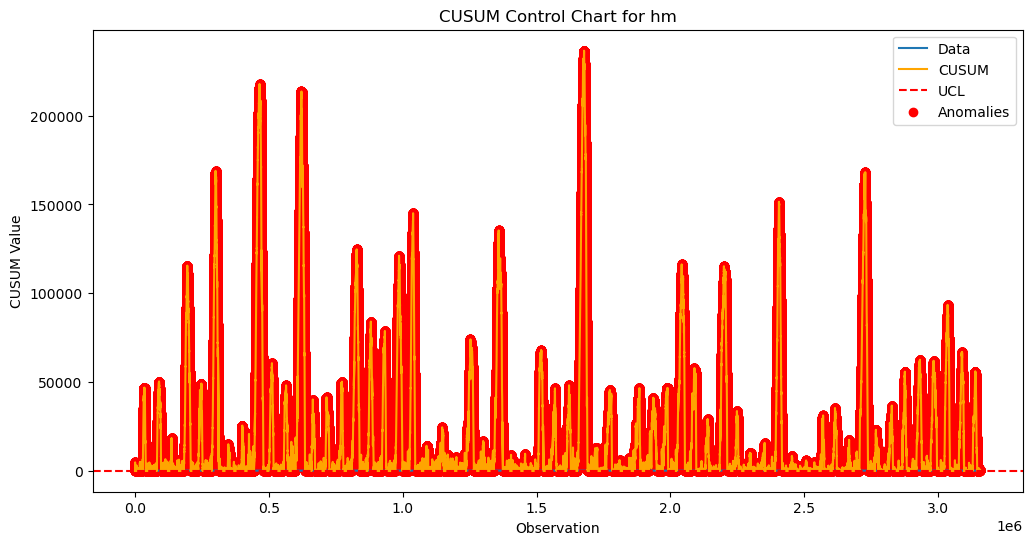

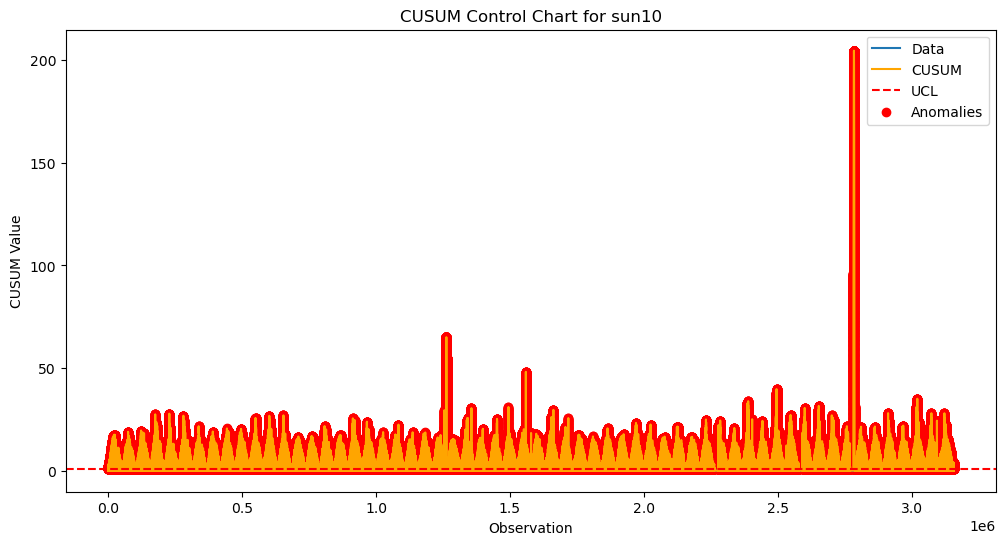

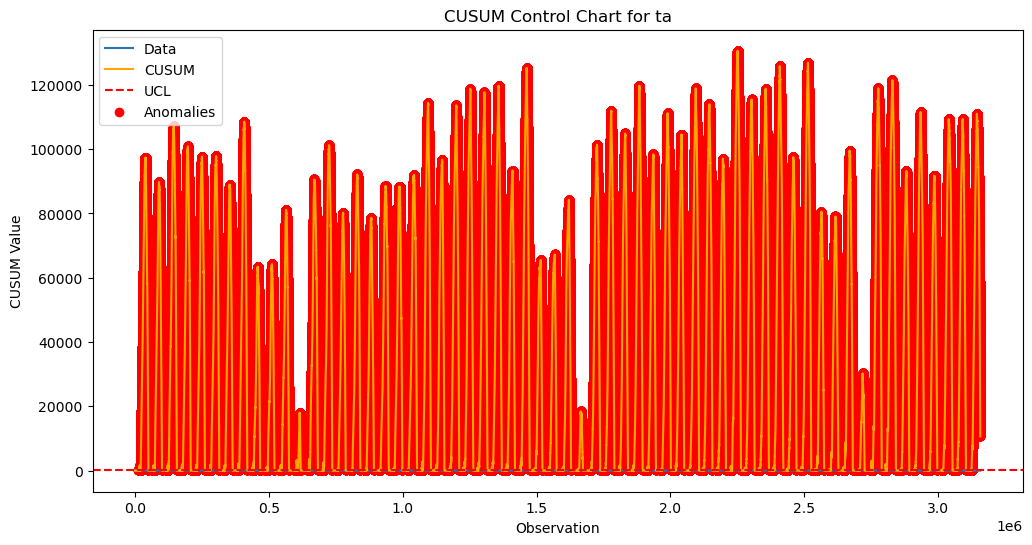

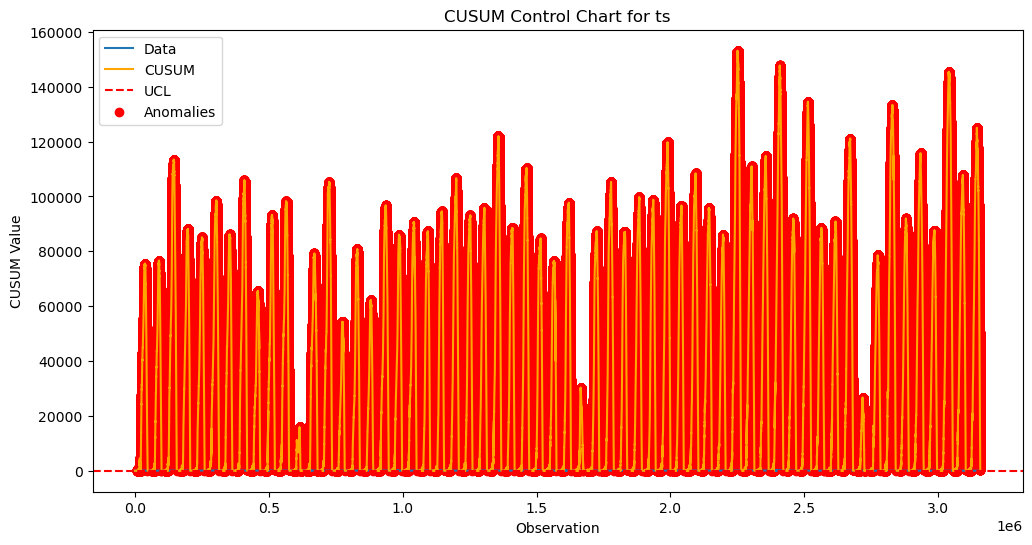

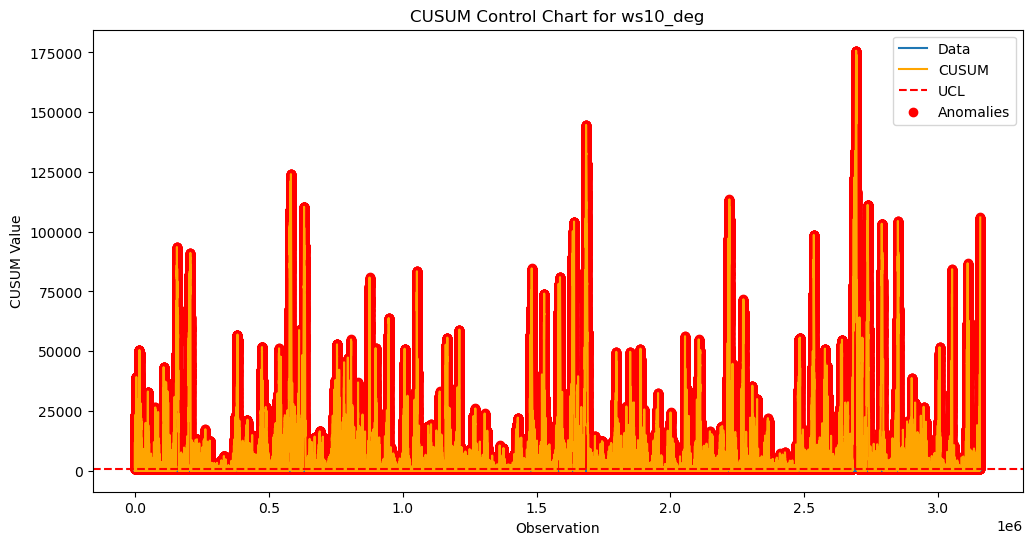

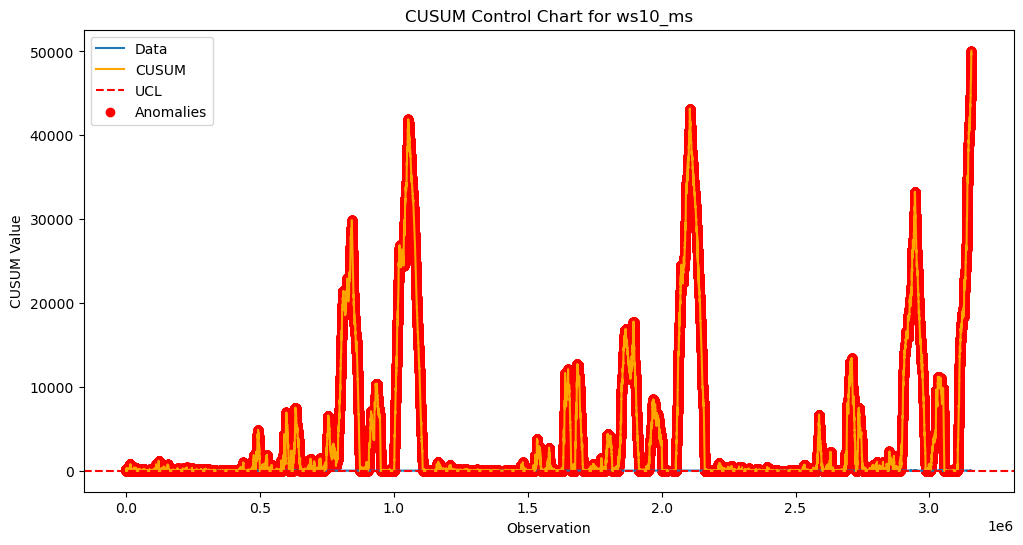

hm 컬럼은 1795385 개의 이상치가 확인됨
sun10 컬럼은 1335551 개의 이상치가 확인됨
ta 컬럼은 1929277 개의 이상치가 확인됨
ts 컬럼은 1961755 개의 이상치가 확인됨
ws10_deg 컬럼은 1429588 개의 이상치가 확인됨
ws10_ms 컬럼은 1523726 개의 이상치가 확인됨
총 1523726 개의 이상치가 확인됨


In [9]:
# 기존
# 이상치 처리가 필요한 열들
features = df.columns.difference(['year', 'month', 'day', 'time', 're', 'stn_id', 'minute', 'vis1', 'class'])

# CUSUM을 사용한 이상치 탐지 함수
def detect_anomalies_cusum(data, mean, std_dev, k_factor=0.5, ucl_factor=5):
    k = k_factor * std_dev  # 제어 한계 계수
    UCL = ucl_factor * std_dev  # UCL (Upper Control Limit)
    cusum = [0]
    for i in range(1, len(data)):
        s_i = max(0, cusum[-1] + (data[i] - mean - k))
        cusum.append(s_i)
    anomalies = [i for i, x in enumerate(cusum) if x > UCL]
    return anomalies, cusum, UCL

# 각 열에서 이상치를 탐지하고, 이상치 개수를 출력 및 시각화
outliers_indices_after = {}

for feature in features:
    column_data = df[feature].dropna().values  # NaN 값 제외
    mean = np.mean(column_data)
    std_dev = np.std(column_data)
    anomalies, cusum, UCL = detect_anomalies_cusum(column_data, mean, std_dev)
    outliers_indices_after[feature] = anomalies
    
    # 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(column_data, label='Data')
    plt.plot(cusum, label='CUSUM', color='orange')
    plt.axhline(y=UCL, color='r', linestyle='--', label='UCL')
    plt.scatter(anomalies, [cusum[i] for i in anomalies], color='red', label='Anomalies')
    plt.title(f'CUSUM Control Chart for {feature}')
    plt.xlabel('Observation')
    plt.ylabel('CUSUM Value')
    plt.legend()
    plt.show()

# 이상치 개수 확인
for feature, indices in outliers_indices_after.items():
    a = 0
    a = a + len(indices)
    print(f'{feature} 컬럼은 {len(indices)} 개의 이상치가 확인됨')

print(f'총 {a} 개의 이상치가 확인됨')

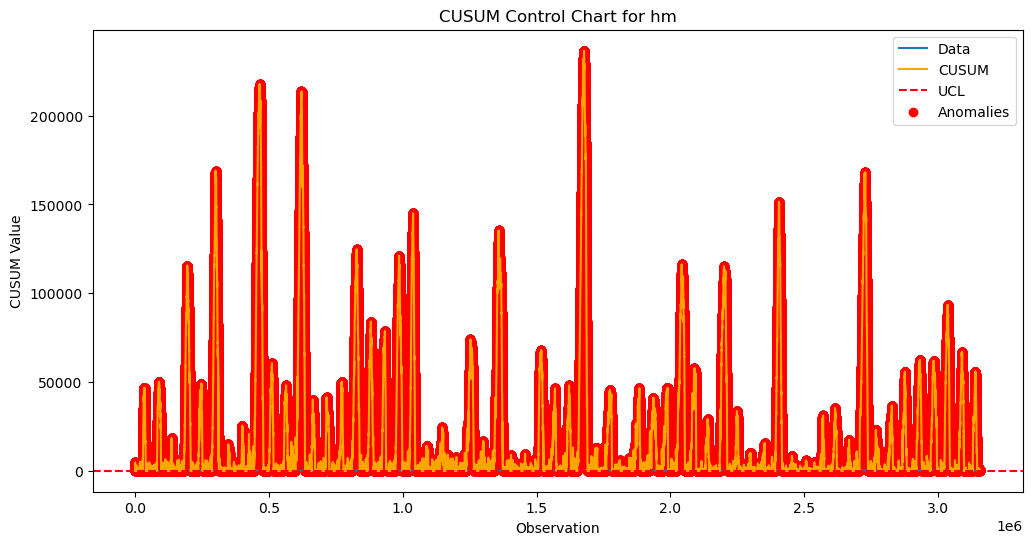

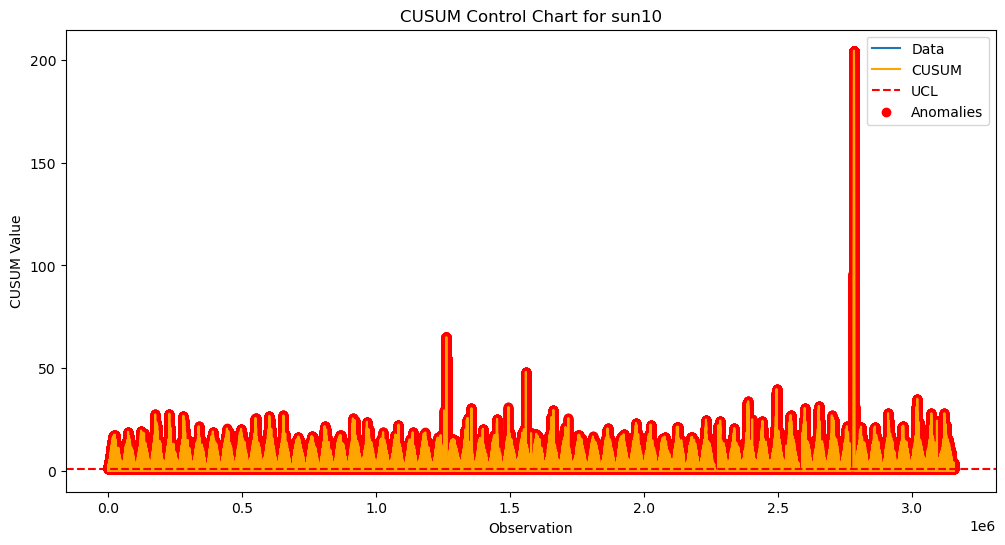

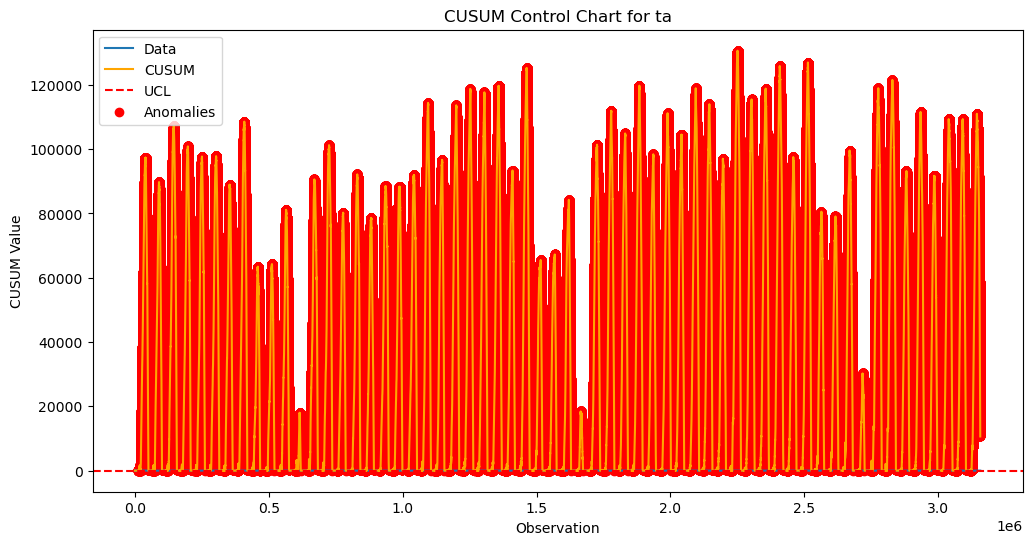

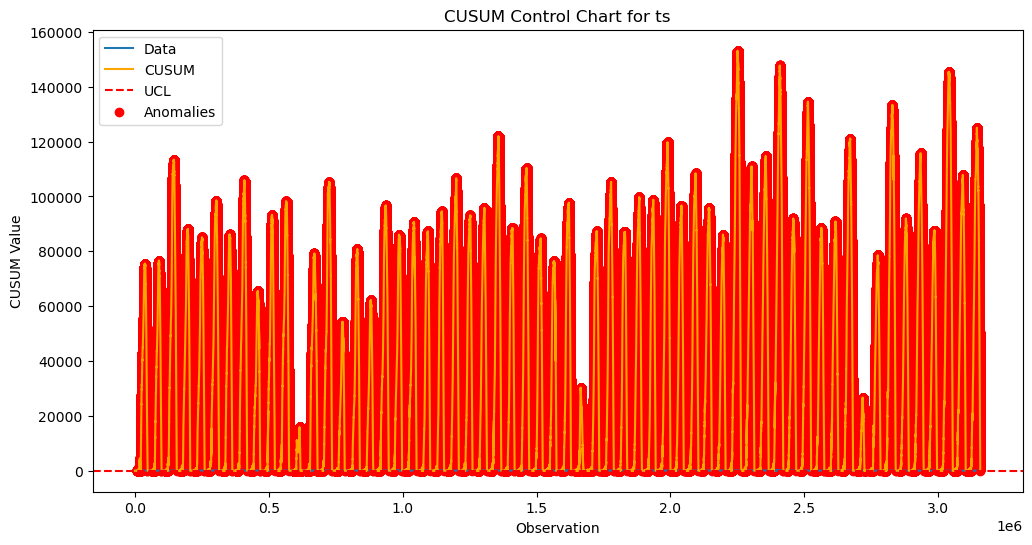

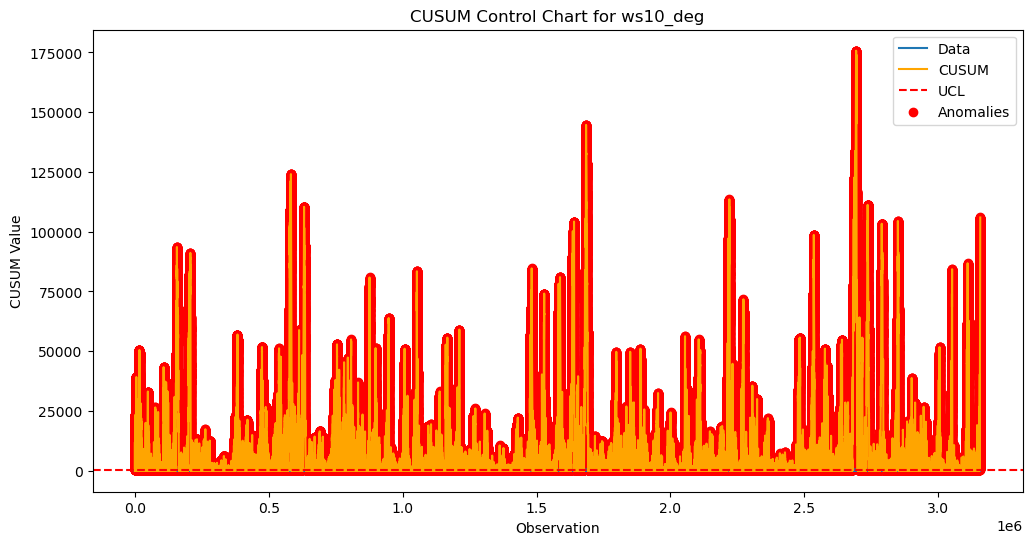

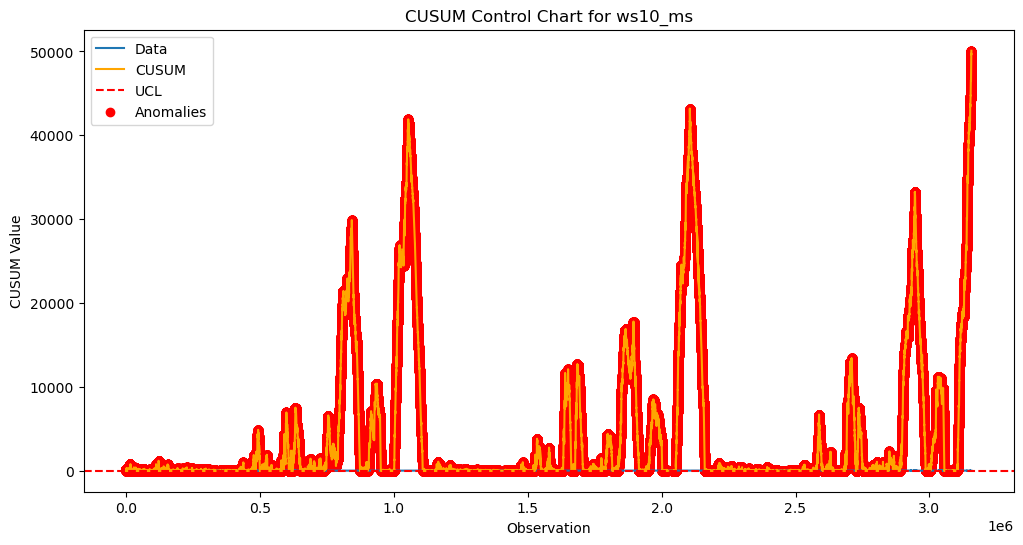

hm 컬럼은 1814542 개의 이상치가 확인됨
sun10 컬럼은 1373077 개의 이상치가 확인됨
ta 컬럼은 1935630 개의 이상치가 확인됨
ts 컬럼은 1971161 개의 이상치가 확인됨
ws10_deg 컬럼은 1479476 개의 이상치가 확인됨
ws10_ms 컬럼은 1539309 개의 이상치가 확인됨
총 1539309 개의 이상치가 확인됨


In [10]:
# k를 각 열의 0.5*std 적용
# ucl_factoerr 3에서 5 사이의 값이 많이 사용

# 이상치 처리가 필요한 열들
features = df.columns.difference(['year', 'month', 'day', 'time', 're', 'stn_id', 'minute', 'vis1', 'class'])

# CUSUM을 사용한 이상치 탐지 함수 (k를 0.5 * 표준편차로 설정)
def detect_anomalies_cusum(data, mean, std_dev, k_factor=0.5, ucl_factor=4):
    k = k_factor * std_dev  # 제어 한계 계수
    UCL = ucl_factor * std_dev  # UCL (Upper Control Limit)
    cusum = [0]
    for i in range(1, len(data)):
        s_i = max(0, cusum[-1] + (data[i] - mean - k))
        cusum.append(s_i)
    anomalies = [i for i, x in enumerate(cusum) if x > UCL]
    return anomalies, cusum, UCL

# 각 열에서 이상치를 탐지하고, 이상치 개수를 출력 및 시각화
outliers_indices_after = {}

for feature in features:
    column_data = df[feature].dropna().values  # NaN 값 제외
    mean = np.mean(column_data)
    std_dev = np.std(column_data)
    k = 0.5 * std_dev  # k를 0.5 * 표준편차로 설정
    anomalies, cusum, UCL = detect_anomalies_cusum(column_data, mean, std_dev, k_factor=0.5)
    outliers_indices_after[feature] = anomalies
    
    # 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(column_data, label='Data')
    plt.plot(cusum, label='CUSUM', color='orange')
    plt.axhline(y=UCL, color='r', linestyle='--', label='UCL')
    plt.scatter(anomalies, [cusum[i] for i in anomalies], color='red', label='Anomalies')
    plt.title(f'CUSUM Control Chart for {feature}')
    plt.xlabel('Observation')
    plt.ylabel('CUSUM Value')
    plt.legend()
    plt.show()

# 이상치 개수 확인
for feature, indices in outliers_indices_after.items():
    a = 0
    a = a + len(indices)
    print(f'{feature} 컬럼은 {len(indices)} 개의 이상치가 확인됨')

print(f'총 {a} 개의 이상치가 확인됨')

**1. Data (데이터)**
각 열의 실제 관측값입니다. 이는 원본 데이터로, 시계열 형태로 플롯됩니다.
그래프에서 파란색 선으로 표시되어 있습니다.

**2. CUSUM (누적합)**
CUSUM은 누적합을 나타내며, 각 데이터 포인트가 평균값에서 얼마나 벗어나 있는지를 누적하여 계산한 값입니다.
이를 통해 시간에 따른 변화 패턴을 확인할 수 있습니다.
그래프에서 주황색 선으로 표시되어 있습니다.

**3. UCL (Upper Control Limit, 상한선)**
UCL은 상한선을 나타내며, 통계적 공정 제어에서 공정이 통제 상태에 있는지를 판단하는 기준입니다.
누적합이 이 선을 넘을 경우, 이상치로 간주됩니다.
그래프에서 빨간색 점선으로 표시되어 있습니다.

**4.Anomalies (이상치)**
이상치는 누적합이 UCL을 초과한 데이터 포인트를 나타냅니다.
이러한 포인트는 정상적인 범위를 벗어난 것으로 간주되어 관심 대상이 됩니다.
그래프에서 빨간색 점으로 표시되어 있습니다.

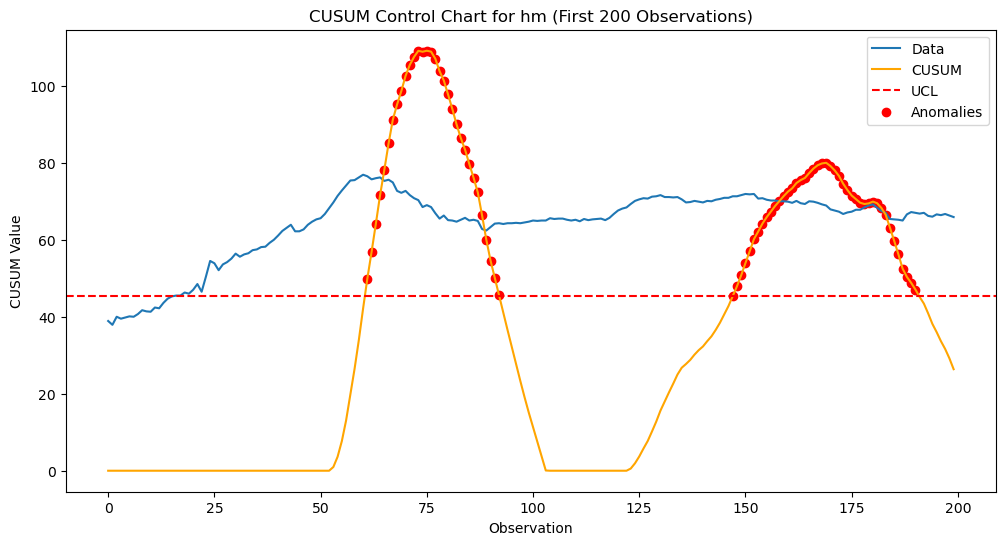

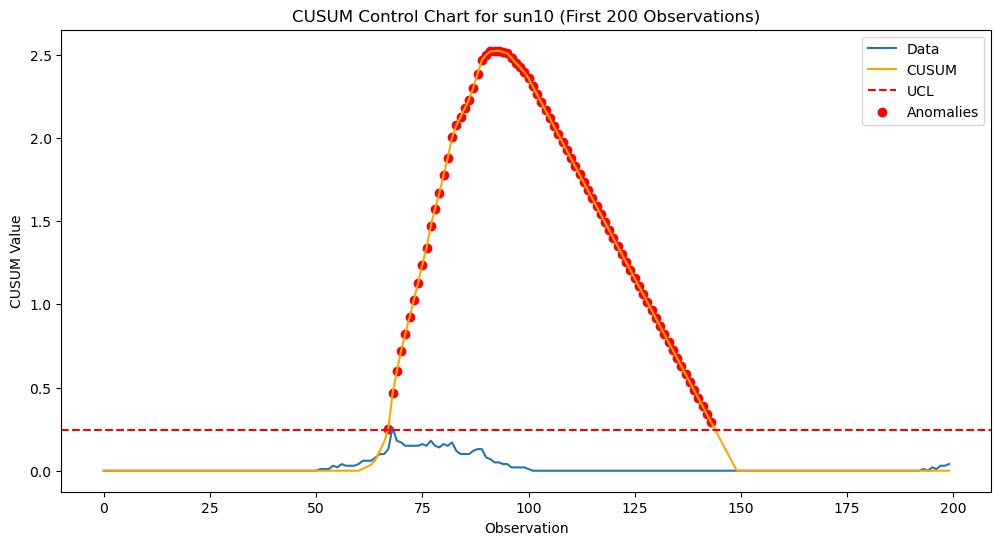

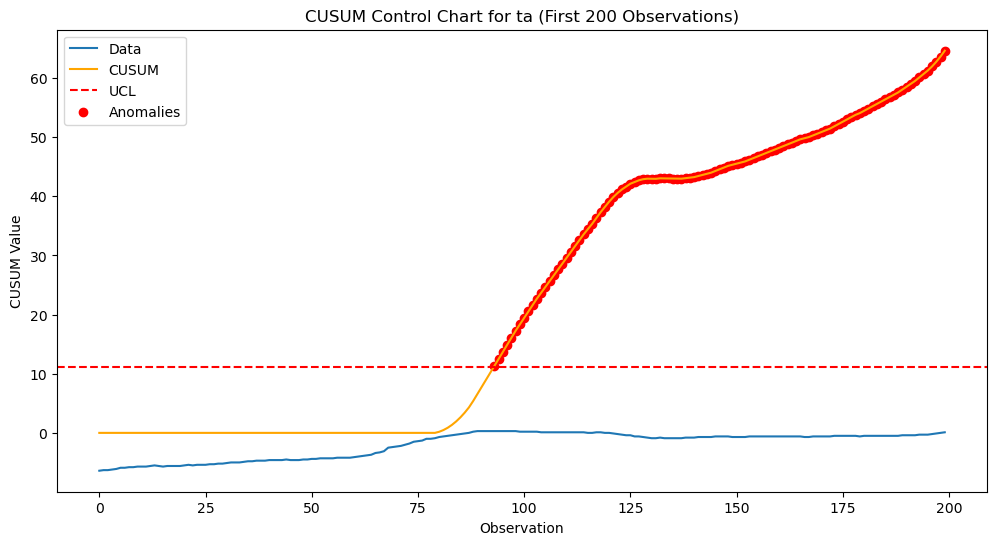

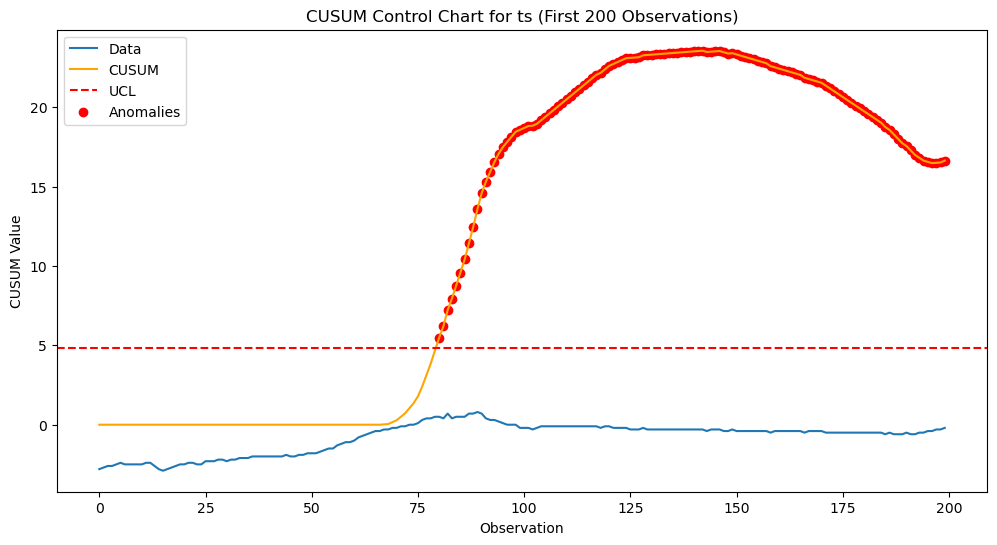

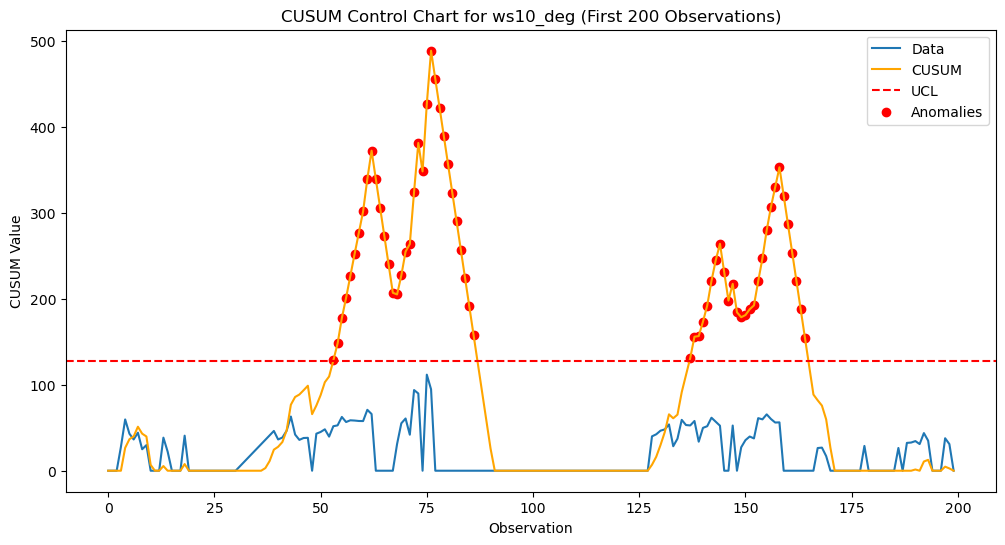

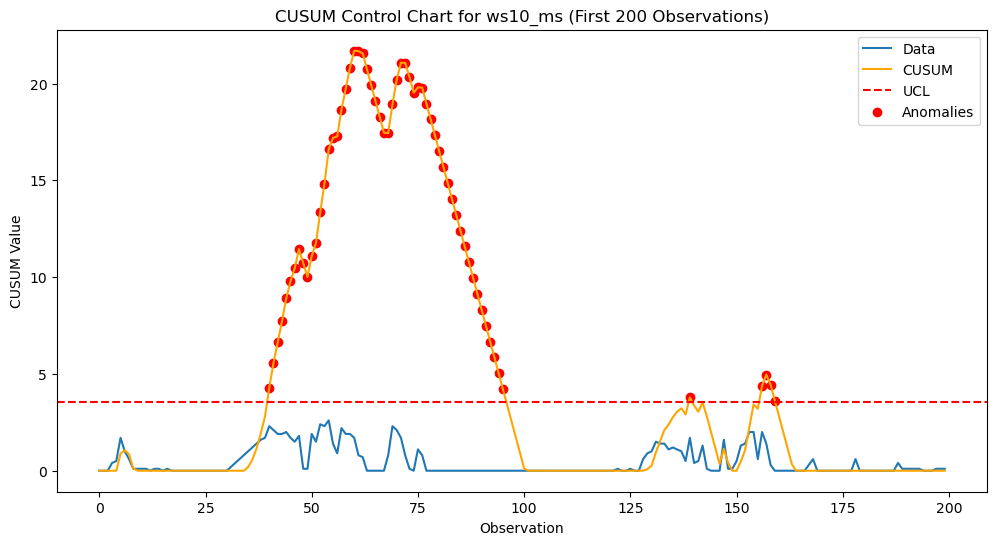

hm 컬럼은 이상치 대체 후 76 개의 이상치가 확인됨
sun10 컬럼은 이상치 대체 후 77 개의 이상치가 확인됨
ta 컬럼은 이상치 대체 후 107 개의 이상치가 확인됨
ts 컬럼은 이상치 대체 후 120 개의 이상치가 확인됨
ws10_deg 컬럼은 이상치 대체 후 62 개의 이상치가 확인됨
ws10_ms 컬럼은 이상치 대체 후 61 개의 이상치가 확인됨


In [11]:
# 그래프를 자세히 보기 위해 몇 개만
features = df.columns.difference(['year', 'month', 'day', 'time', 're', 'stn_id', 'minute', 'vis1', 'class'])

# CUSUM을 사용한 이상치 탐지 함수
def detect_anomalies_cusum(data, mean, std_dev, k_factor=0.5, ucl_factor=5):
    k = k_factor * std_dev  # 제어 한계 계수
    UCL = ucl_factor * std_dev  # UCL (Upper Control Limit)
    cusum = [0]
    for i in range(1, len(data)):
        s_i = max(0, cusum[-1] + (data[i] - mean - k))
        cusum.append(s_i)
    anomalies = [i for i, x in enumerate(cusum) if x > UCL]
    return anomalies, cusum, UCL

# 각 열에서 이상치를 탐지하고, 이상치 개수를 출력 및 시각화
outliers_indices_after = {}

for feature in features:
    column_data = df[feature].dropna().values  # NaN 값 제외
    # 데이터 샘플링 (처음 200개 데이터 사용)
    sample_data = column_data[:200]
    mean = np.mean(sample_data)
    std_dev = np.std(sample_data)
    anomalies, cusum, UCL = detect_anomalies_cusum(sample_data, mean, std_dev)
    outliers_indices_after[feature] = anomalies
    
    # 시각화
    plt.figure(figsize=(12, 6))
    plt.plot(sample_data, label='Data')
    plt.plot(cusum, label='CUSUM', color='orange')
    plt.axhline(y=UCL, color='r', linestyle='--', label='UCL')
    plt.scatter(anomalies, [cusum[i] for i in anomalies], color='red', label='Anomalies')
    plt.title(f'CUSUM Control Chart for {feature} (First 200 Observations)')
    plt.xlabel('Observation')
    plt.ylabel('CUSUM Value')
    plt.legend()
    plt.show()

# 대체 후 이상치 개수 확인
for feature, indices in outliers_indices_after.items():
    print(f'{feature} 컬럼은 이상치 대체 후 {len(indices)} 개의 이상치가 확인됨')